In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 데이터 불러오기
df2019 = pd.read_csv("dust2019.csv")
df2018 = pd.read_csv("dust2018.csv")
df2017 = pd.read_csv("dust2017.csv")
df2016 = pd.read_csv("dust2016.csv")

In [3]:
# 데이터 확인
df2019.info()
print("==========================================================")
df2018.info()
print("==========================================================")
df2017.info()
print("==========================================================")
df2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 12 columns):
date               9125 non-null object
region             9125 non-null object
district           9125 non-null object
fine_dust          9125 non-null float64
super_fine_dust    9125 non-null float64
oz                 9125 non-null float64
co                 9125 non-null float64
co2                9125 non-null float64
so2                9125 non-null float64
month              9125 non-null int64
weekday            9125 non-null object
day                9125 non-null int64
dtypes: float64(6), int64(2), object(4)
memory usage: 855.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 12 columns):
date               9125 non-null object
region             9125 non-null object
district           9125 non-null object
fine_dust          9125 non-null float64
super_fine_dust    9125 non-null float64
oz                 9125 non-null flo

In [4]:
## 각 데이터 날짜 object -> datetime 형으로 변환해주기
df2019.date = pd.to_datetime(df2019.date.astype('str'))
df2018.date = pd.to_datetime(df2018.date.astype('str'))
df2017.date = pd.to_datetime(df2017.date.astype('str'))
df2016.date = pd.to_datetime(df2016.date.astype('str'))

In [5]:
df2019.info()
print("==========================================================")
df2018.info()
print("==========================================================")
df2017.info()
print("==========================================================")
df2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 12 columns):
date               9125 non-null datetime64[ns]
region             9125 non-null object
district           9125 non-null object
fine_dust          9125 non-null float64
super_fine_dust    9125 non-null float64
oz                 9125 non-null float64
co                 9125 non-null float64
co2                9125 non-null float64
so2                9125 non-null float64
month              9125 non-null int64
weekday            9125 non-null object
day                9125 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(2), object(3)
memory usage: 855.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 12 columns):
date               9125 non-null datetime64[ns]
region             9125 non-null object
district           9125 non-null object
fine_dust          9125 non-null float64
super_fine_dust    9125 non-null float64
o

In [6]:
# 한글 폰트
import matplotlib.font_manager as fm

font_path = 'C:\\WINDOWS\\Fonts\\gulim.ttc'
font_name = fm.FontProperties(fname=font_path).get_name()

plt.rcParams['font.family'] = font_name

In [8]:
# 4개년 합친 데이터 프레임 생성
uniondf = pd.concat([df2019,df2018,df2017,df2016])

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [19]:
uniondf['year'] = uniondf.date.dt.year

In [9]:
uniondf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36525 entries, 0 to 9149
Data columns (total 12 columns):
co                 36525 non-null float64
co2                36525 non-null float64
date               36525 non-null datetime64[ns]
day                36525 non-null int64
district           36525 non-null object
fine_dust          36525 non-null float64
month              36525 non-null int64
oz                 36525 non-null float64
region             36525 non-null object
so2                36525 non-null float64
super_fine_dust    36525 non-null float64
weekday            36525 non-null object
dtypes: datetime64[ns](1), float64(6), int64(2), object(3)
memory usage: 3.6+ MB


## 가설 1. 서쪽 권역이 미세먼지가 더 높을까?


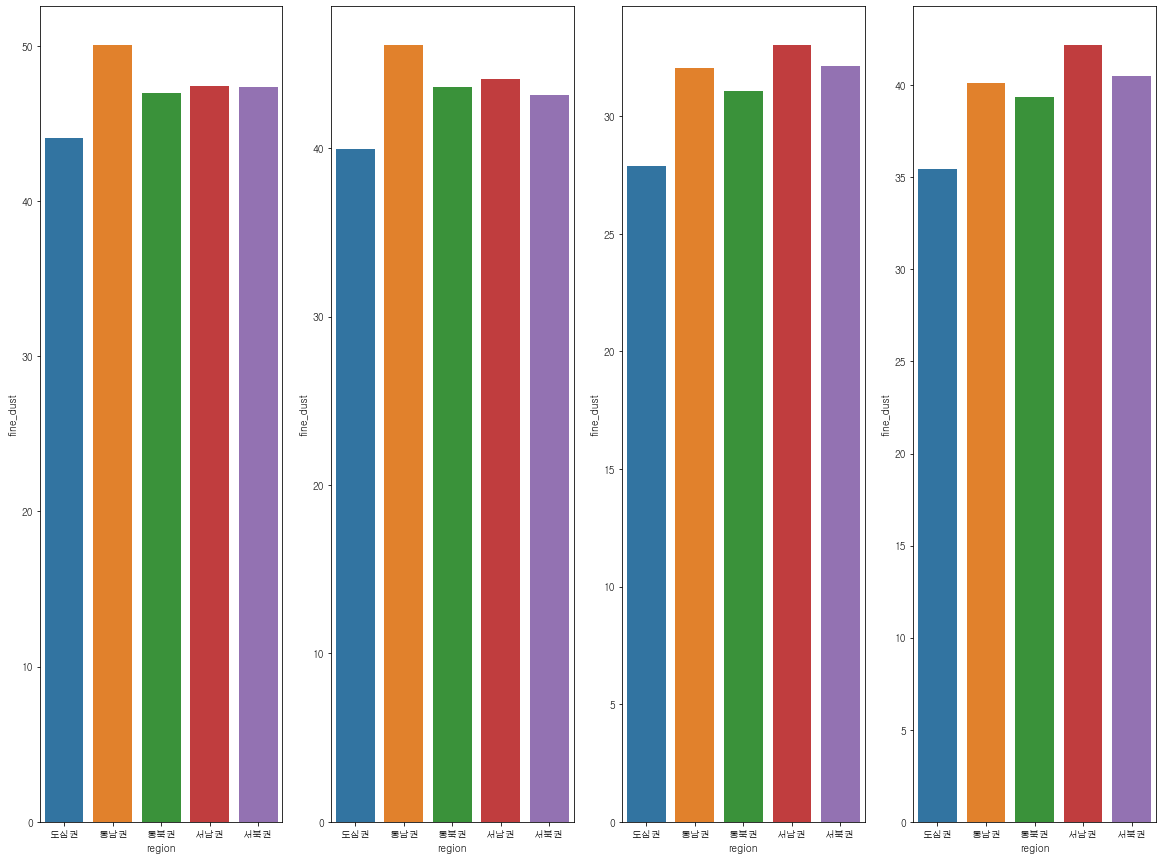

In [36]:
#  -- 연도별 권역별 미세먼지의 평균 그래프 비교
df1 = df2016.groupby(df2016['region']).mean().reset_index()
df2 = df2017.groupby(df2017['region']).mean().reset_index()
df3 = df2018.groupby(df2018['region']).mean().reset_index()
df4 = df2019.groupby(df2019['region']).mean().reset_index()

fig, ax = plt.subplots(ncols=4)
sns.barplot(x='region', y='fine_dust', data=df1, ax = ax[0])
sns.barplot(x='region', y='fine_dust', data=df2, ax = ax[1])
sns.barplot(x='region', y='fine_dust', data=df3, ax = ax[2])
sns.barplot(x='region', y='fine_dust', data=df4, ax = ax[3])

In [37]:
fig.savefig('1.png')

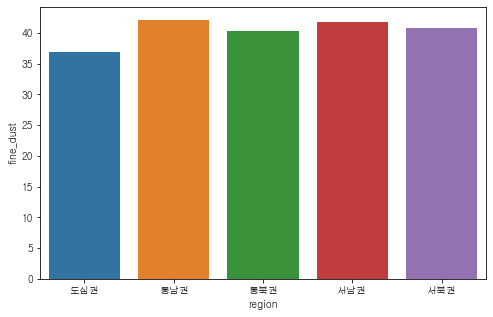

In [40]:
#  -- 4개년 연도별 권역별 미세먼지의 평균그래프
plt.figure(figsize = (8,5))
df1 = uniondf.groupby(uniondf['region']).mean().reset_index()
sns.barplot(x='region', y='fine_dust', data=df1)

In [41]:
fig.savefig('2.png')

In [13]:
print(df2019.loc[df2019.region == '도심권','district'].unique())
print(df2019.loc[df2019.region == '동남권','district'].unique())
print(df2019.loc[df2019.region == '동북권','district'].unique())
print(df2019.loc[df2019.region == '서남권','district'].unique())
print(df2019.loc[df2019.region == '서북권','district'].unique())

['종로구' '용산구' '중구']
['강동구' '강남구' '서초구' '송파구']
['노원구' '도봉구' '강북구' '성북구' '광진구' '성동구' '중랑구' '동대문구']
['동작구' '관악구' '강서구' '구로구' '양천구' '영등포구' '금천구']
['은평구' '서대문구' '마포구']


- 미세먼지는 서울 서쪽 권역이라서 더 높지 않음을 알 수 있음
- 서쪽과 가까운 중국과 편서풍의 영향 등으로 서울도 서쪽이 더 미세먼지 농도가 심할 것이라 예상했지만 예상과 다름.
- 도심권도 다른 권역에 비해 크게 미세먼지 농도가 높게 나타나지 않았으며, 평균적으로 큰 차이를 보이지 않았지만 북쪽 권역보다는 남쪽 권역이 미세먼지가 더 높은 것을 알 수 있음

In [14]:
# 연도별 미세먼지가 가장 높은 구

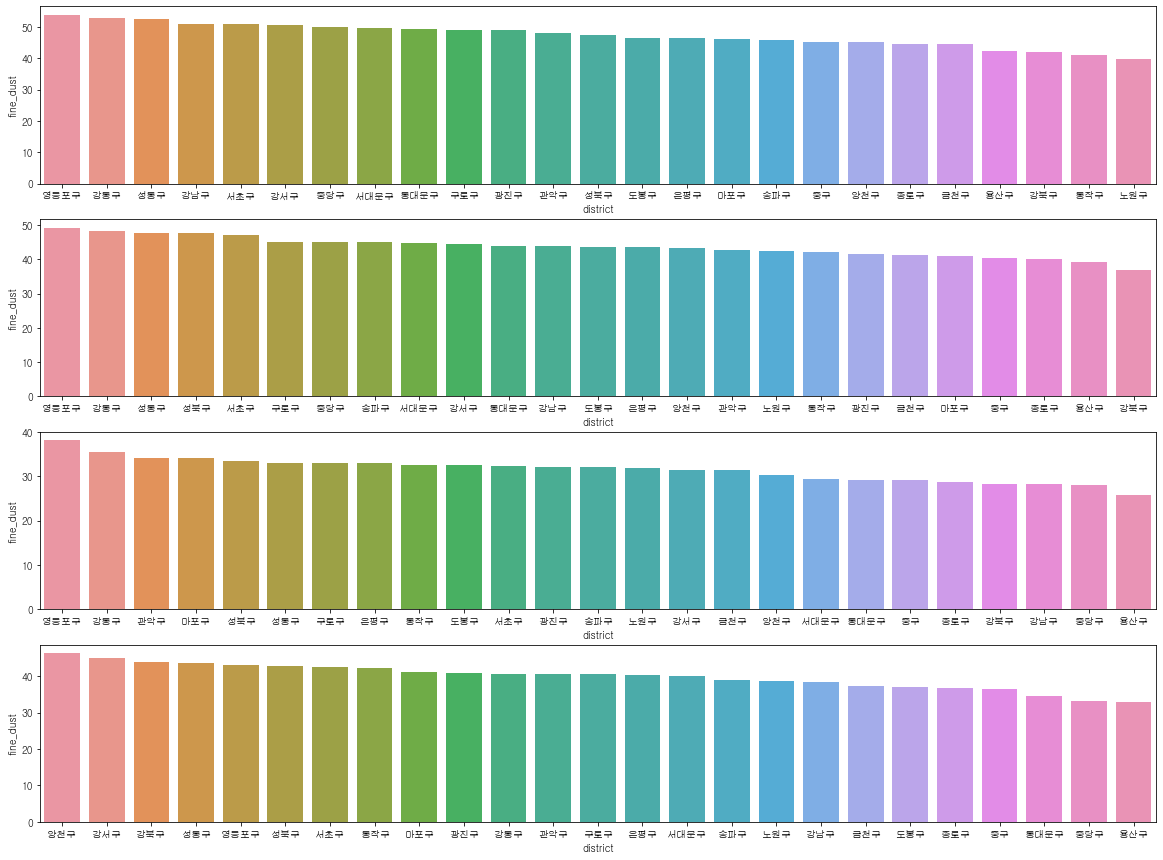

In [42]:
d2016 = df2016.groupby('district').mean().reset_index().sort_values('fine_dust', ascending = False).reset_index(drop=True)
d2017 = df2017.groupby('district').mean().reset_index().sort_values('fine_dust', ascending = False).reset_index(drop=True)
d2018 = df2018.groupby('district').mean().reset_index().sort_values('fine_dust', ascending = False).reset_index(drop=True)
d2019 = df2019.groupby('district').mean().reset_index().sort_values('fine_dust', ascending = False).reset_index(drop=True)



fig, ax = plt.subplots(nrows=4)
sns.barplot(x='district', y = 'fine_dust',data = d2016, ax = ax[0])
sns.barplot(x='district', y = 'fine_dust',data = d2017, ax = ax[1])
sns.barplot(x='district', y = 'fine_dust',data = d2018, ax = ax[2])
sns.barplot(x='district', y = 'fine_dust',data = d2019, ax = ax[3])

In [43]:
fig.savefig('3.png')

## 가설2. 봄 시즌에 미세먼지가 눈에 띄게 높지 않을까?

In [16]:
# 봄 - 3,4,5 월에 미세먼지 농도가 더 높아지지 않는지 확인하기 위해 월별 라인그래프를 그려봄

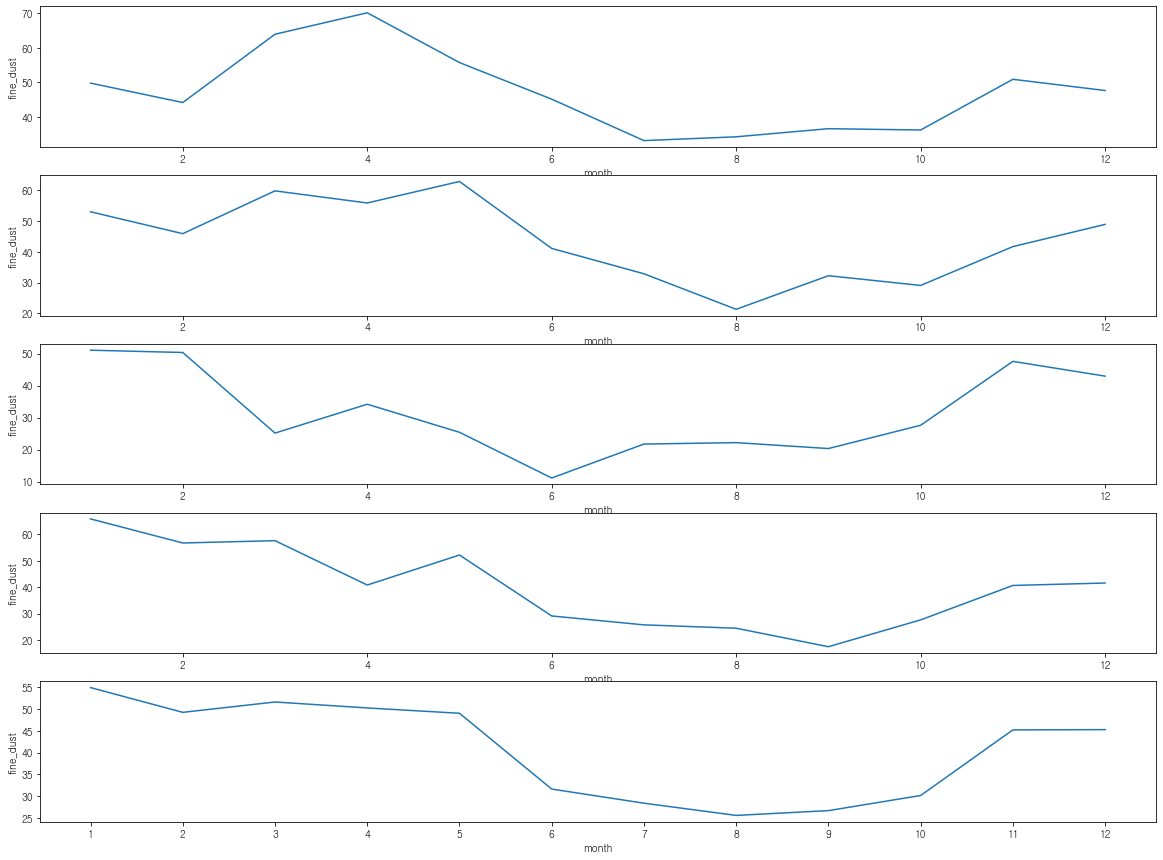

In [44]:
# 월별, 총 4개년 미세먼지 평균 라인그래프
dt2016 = df2016.groupby('month').mean().reset_index()
dt2017 = df2017.groupby('month').mean().reset_index()
dt2018 = df2018.groupby('month').mean().reset_index()
dt2019 = df2019.groupby('month').mean().reset_index()
unidt = uniondf.groupby(['month']).mean().reset_index()


fig, ax = plt.subplots(nrows=5)
plt.xticks(np.arange(1,13))

sns.lineplot(x = 'month', y= 'fine_dust', data = dt2016, ax = ax[0])
sns.lineplot(x = 'month', y= 'fine_dust', data = dt2017, ax = ax[1])
sns.lineplot(x = 'month', y= 'fine_dust', data = dt2018, ax = ax[2])
sns.lineplot(x = 'month', y= 'fine_dust', data = dt2019, ax = ax[3])
sns.lineplot(x = 'month', y = 'fine_dust', data = unidt, ax = ax[4])


In [45]:
fig.savefig('4.png')

미세먼지는 여름철보다 겨울~봄철에 농도가 짙다는 것을 확인 할 수 있었다.

## 가설3. 최근 4년 동안 미세먼지는 지속적으로 심각해졌나?

In [20]:
uni_temp = uniondf.groupby('year').mean().reset_index()

In [21]:
uni_temp = uni_temp[['year','fine_dust','super_fine_dust']]

In [22]:
uni_temp

,year,fine_dust,super_fine_dust
0,2016,47.284481,25.877158
1,2017,43.668603,24.615342
2,2018,31.519562,18.191890
3,2019,39.947726,23.792998


In [23]:
uni_temp['year'] = uni_temp.year.astype('str')

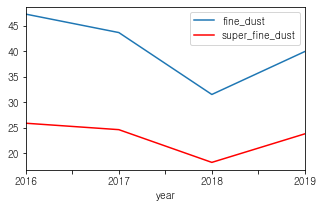

In [24]:
plt.rcParams["figure.figsize"] = (5,3)
ax = uni_temp.plot(x='year', y='fine_dust')
uni_temp.plot(x='year', y='super_fine_dust', color='red', ax=ax)

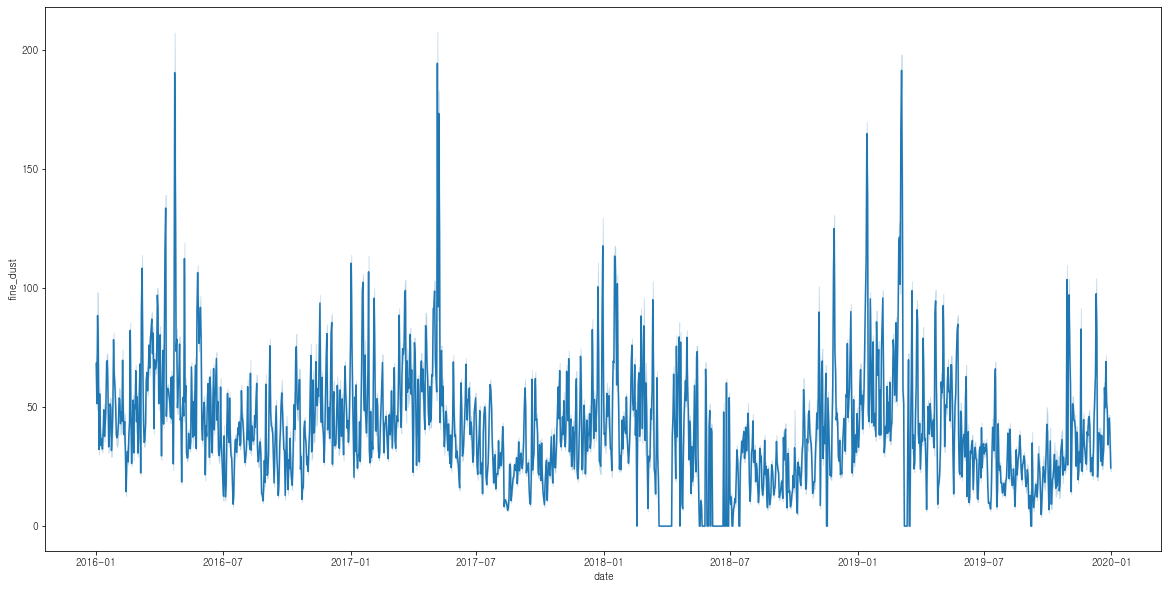

In [46]:
plt.figure(figsize=(20,10))
sns.lineplot(x = 'date', y= 'fine_dust', data = uniondf)

2018년 결측 데이터가 많아 매년 미세먼지가 증가추세였는지 정확한 판단은 어려움.
하지만 2018년의 데이터가 아니어도 미세먼지가 지속적으로 증가했다기 보다는 매년 특정기간에 눈에 띄게 농도가 짙어지는 시기가 있음

In [26]:
uniondf= uniondf.reindex(columns = ["date", 'region', 'district', 'fine_dust','super_fine_dust', 'oz', 'co', 'co2', 'so2','day','month','year','weekday'])

In [27]:
uniondf.head()

,date,region,district,fine_dust,super_fine_dust,oz,co,co2,so2,day,month,year,weekday
0,2019-01-01,동남권,강동구,43.0,32.0,0.005,0.040,0.010,0.8,1,1,2019,tue
1,2019-01-01,서남권,동작구,43.0,28.0,0.003,0.034,0.015,0.5,1,1,2019,tue
2,2019-01-01,서남권,관악구,41.0,29.0,0.005,0.036,0.016,0.5,1,1,2019,tue
3,2019-01-01,동북권,노원구,44.0,32.0,0.005,0.033,0.013,0.7,1,1,2019,tue
4,2019-01-01,서남권,강서구,47.0,25.0,0.005,0.030,0.017,0.6,1,1,2019,tue


In [28]:
union_temp = uniondf.iloc[:,3:8]

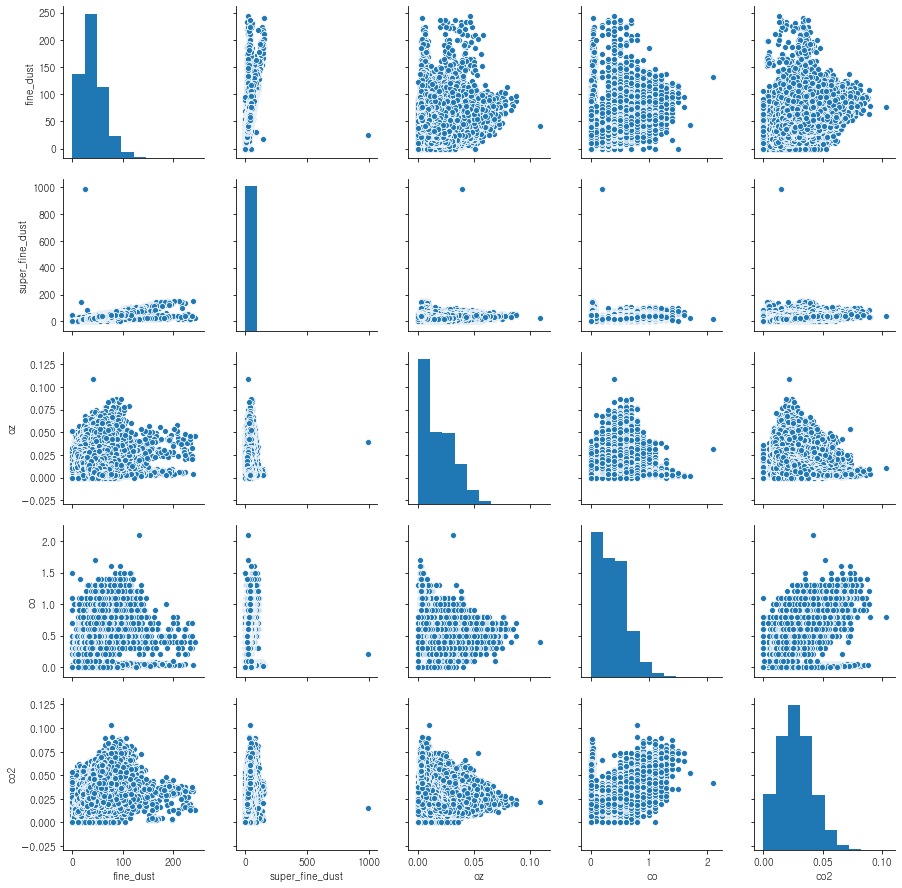

In [52]:
# 환경 수치별 pairplot 찍어보기
sns.pairplot(union_temp)

In [54]:
plt.savefig('7.png')

<Figure size 1440x1080 with 0 Axes>

(5, 0)

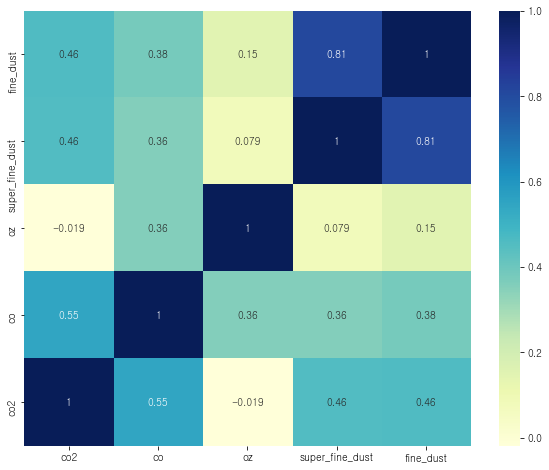

In [49]:
# 각 환경 수치별 상관관계 heatmap
plt.figure(figsize=(10,8))
sns.heatmap(uniondf.iloc[:,3:8].corr(), annot = True, cmap = 'YlGnBu')
plt.ylim([5,0])
plt.xlim([5,0])

In [51]:
plt.savefig('6.png')

각 수치별 상관관계 히트맵을 본 결과 미세먼지와 가장 관련이 높은 건 초미세먼지

미세먼지는 일반적으로 입자 크기가 10㎛(=0.001㎝) 이하인 먼지
석탄·석유 등의 화석연료를 태울 때나 공장·자동차 등의 배출가스에서 많이 발생
중금속, 유해화학물질 등이 들어있어 인체에 심각한 영향을 줌

지름이 10㎛보다 작은 '미세먼지(PM10)'
지름이 2.5㎛보다 작은 '초미세먼지(PM2.5)'

우리나라 미세먼지(PM10) 등급은 '좋음'이 0∼30㎍/㎥, '보통'은 31∼80㎍/㎥, '나쁨'은 81∼150㎍/㎥, '매우 나쁨'은 151㎍/㎥ 이상
초미세먼지(PM2.5)는 '좋음'이 0∼15㎍/㎥, '보통'이 16∼50㎍/㎥, '나쁨'이 51∼100㎍/㎥, '매우 나쁨'이 101㎍/㎥ 이상

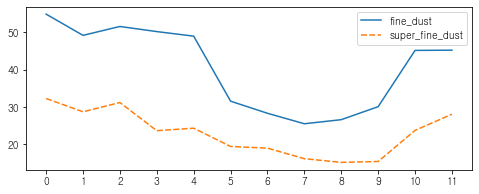

In [31]:
# uniondf_m = uniondf.groupby('month').mean().reset_index()

# plt.figure(figsize=(8,3))
# plt.xticks(np.arange(0, 13, 1))
# #ax = temp2016_m.lineplot(x='month', y='fine_dust')
# sns.lineplot(data=uniondf_m[['fine_dust','super_fine_dust']])

In [32]:
uniondf_m = uniondf.groupby('month').mean().reset_index()
uniondf_m = uniondf_m.iloc[:,:-2]
uniondf_m.head()

,month,fine_dust,super_fine_dust,oz,co,co2,so2
0,1,54.918710,32.316129,0.011661,0.491578,0.029257,0.194162
1,2,49.233274,28.755752,0.014463,0.460590,0.029686,0.173225
2,3,51.612258,31.243871,0.016871,0.374810,0.029645,0.125727
3,4,50.243667,23.699667,0.022678,0.347523,0.029762,0.116708
4,5,49.020968,24.367419,0.026312,0.314822,0.029554,0.121582


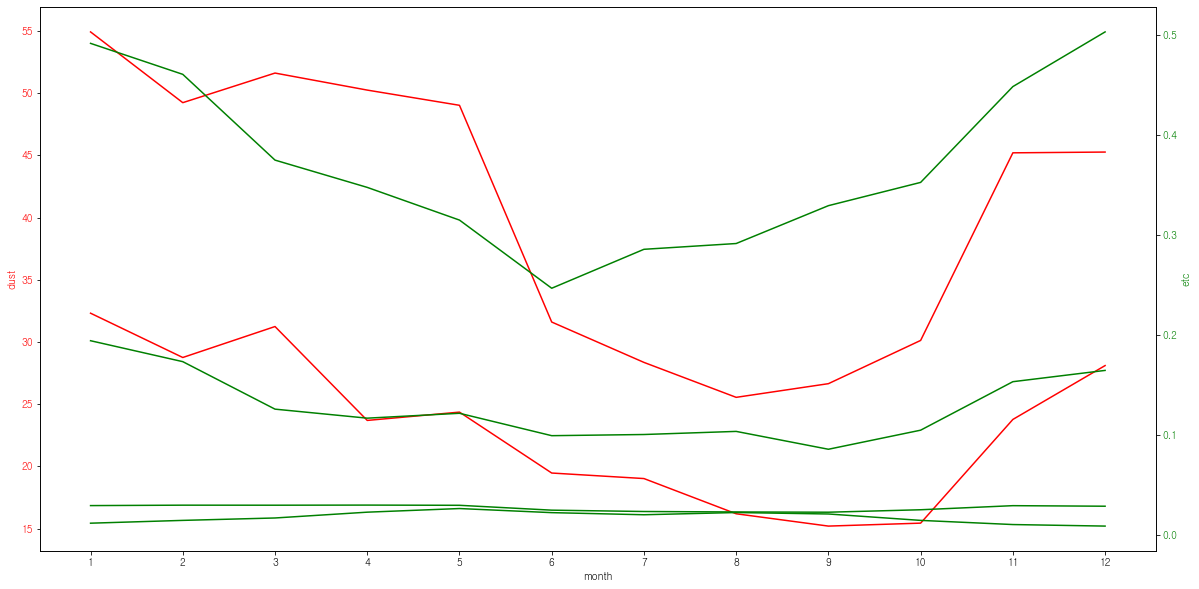

In [55]:
x = uniondf_m.month.astype('str')

y1 = uniondf_m[['fine_dust','super_fine_dust']]
y2 = uniondf_m[['oz','co','co2','so2']]


plt.rcParams["figure.figsize"] = (20,10)
fig, ax1 = plt.subplots()


ax1.set_xlabel('month')
ax1.set_ylabel('dust', color='red')
ax1.plot(x, y1, color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()  
ax2.set_ylabel('etc', color='green')  
ax2.plot(x, y2, color='green')
ax2.tick_params(axis='y', labelcolor='green')

#fig.tight_layout()
plt.show()


In [56]:
fig.savefig('8.png')